In [1]:
import pandas as pd
import random
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
warnings.filterwarnings('ignore')

# **Step 1 - Reading the Data**


# tasks
### Calculate the percentaage of missing values ?¶
### Handle data types
### Plotting the data ( EDA ) to explore potential handling techniques
### Detect the outlier
### Explore How to visulaize the Date and time data in column ( Policy Start Date )

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv') # Loading the insurance dataset into a DataFrame


In [4]:
df

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,...,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [5]:
df.info() # Checking for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

# **step 2 Detecting the proplems !** 
 ## 1-  Dropping columns as it is not useful for analysis

In [6]:
df.drop(columns=['id'], inplace=True)  # Dropping 'id' column as it is not useful for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

## 2- converting date and time columns to 'datetime64'

In [7]:
df['Policy Start Date'] = df['Policy Start Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Age                   1181295 non-null  float64       
 1   Gender                1200000 non-null  object        
 2   Annual Income         1155051 non-null  float64       
 3   Marital Status        1181471 non-null  object        
 4   Number of Dependents  1090328 non-null  float64       
 5   Education Level       1200000 non-null  object        
 6   Occupation            841925 non-null   object        
 7   Health Score          1125924 non-null  float64       
 8   Location              1200000 non-null  object        
 9   Policy Type           1200000 non-null  object        
 10  Previous Claims       835971 non-null   float64       
 11  Vehicle Age           1199994 non-null  float64       
 12  Credit Score          1062118 non-null  fl

## 3- Converting categorical columns to 'category' data type
### and Assignment categorical columns to a variable 'cat'
### and Assignment numerical columns to a variable 'num'

In [8]:
cat = df.select_dtypes(include='object').columns # Selecting categorical columns
num = df.select_dtypes(include=['int64', 'float64']).columns # Selecting numerical columns
print("Categorical :", cat)
print("Numerical:", num)

Categorical : Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')
Numerical: Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')


In [9]:
for i in cat: # Converting categorical columns to 'category' data type
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Age                   1181295 non-null  float64       
 1   Gender                1200000 non-null  category      
 2   Annual Income         1155051 non-null  float64       
 3   Marital Status        1181471 non-null  category      
 4   Number of Dependents  1090328 non-null  float64       
 5   Education Level       1200000 non-null  category      
 6   Occupation            841925 non-null   category      
 7   Health Score          1125924 non-null  float64       
 8   Location              1200000 non-null  category      
 9   Policy Type           1200000 non-null  category      
 10  Previous Claims       835971 non-null   float64       
 11  Vehicle Age           1199994 non-null  float64       
 12  Credit Score          1062118 non-null  fl

In [ ]:

cat # Summary statistics for categorical columns

NameError: name 'cat' is not defined

In [10]:
num

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

In [11]:
#  Checking unique values in some columns . if it likes a categorical column or not
print(df['Health Score'].value_counts()) 
""" Checking unique values in 'Health Score' column .
df['Health Score'] = df['Health Score'].astype('category') 
it has a wide range of values """
print(df['Credit Score'].value_counts()) 
""" Checking unique values in 'Credit Score' column .
#df['Credit Score'] = df['Credit Score'].astype('category') it has a wide range of values """

print(df['Number of Dependents'].value_counts()) # Checking unique values in 'Number of Dependents' column .
#df['Number of Dependents'] = df['Number of Dependents'].astype('category') # we can convert it to categorical as it has limited unique values
df.info()

Health Score
19.927241    128
25.907650    124
19.869701    119
22.955402    104
27.845006    103
            ... 
34.912272      1
23.564147      1
23.054968      1
7.078633       1
11.483482      1
Name: count, Length: 532657, dtype: int64
Credit Score
434.0    4288
431.0    4277
757.0    4021
713.0    3977
437.0    3887
         ... 
660.0     472
560.0     444
610.0     404
700.0     377
606.0     352
Name: count, Length: 550, dtype: int64
Number of Dependents
3.0    221475
4.0    220340
0.0    218124
2.0    215313
1.0    215076
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Age                   1181295 non-null  float64       
 1   Gender                1200000 non-null  category      
 2   Annual Income         1155051 non-null  float64       
 3   Marital Status   

## 4- Checking duplicate < non duplicate values>

In [12]:
df.duplicated().sum() # Checking for duplicate rows in the dataset

0

## 5- null values < we have meny null values>

In [13]:
df.isnull().sum() # Checking for null values in each column

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

## >>Calculate the percentaage of missing values ?

In [14]:
count_agenull = df['Age'].isnull().sum()   # Calculate the percentaage of missing values for Age column
percentaage =  count_agenull / df.shape[0] * 100
percentaage 

1.55875

In [15]:
cat

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

In [16]:
# colect missing values py catgorical columns and numerical columns
cat_missing = []
num_missing=[]
for i in cat:
    if df[i].isnull().sum() > 0 :
        cat_missing.append(i) 
for i in num:
    if df[i].isnull().sum() > 0 :
        num_missing.append(i) 

print(cat_missing)
print(num_missing)

['Marital Status', 'Occupation', 'Customer Feedback']
['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']


In [17]:
# defind function Calculate the percentaage of missing values in col

def  Percen_DfNull(col):
    count_agenull = df[col].isnull().sum()   
    percentaage =  count_agenull / df.shape[0] * 100
    return percentaage
print(" percentaage null for  catgorical columns ********************************")
for i in cat_missing:
    print(i,"= ",Percen_DfNull(i).round(4))
print(" \npercentaage null for  numerical columns ********************************")
for i in num_missing:
    print(i,"= ",Percen_DfNull(i).round(4))

 percentaage null for  catgorical columns ********************************
Marital Status =  1.5441
Occupation =  29.8396
Customer Feedback =  6.4853
 
percentaage null for  numerical columns ********************************
Age =  1.5588
Annual Income =  3.7458
Number of Dependents =  9.1393
Health Score =  6.173
Previous Claims =  30.3358
Vehicle Age =  0.0005
Credit Score =  11.4902
Insurance Duration =  0.0001


### >>show Par plot for catgorical columns befor handling missing values add Code

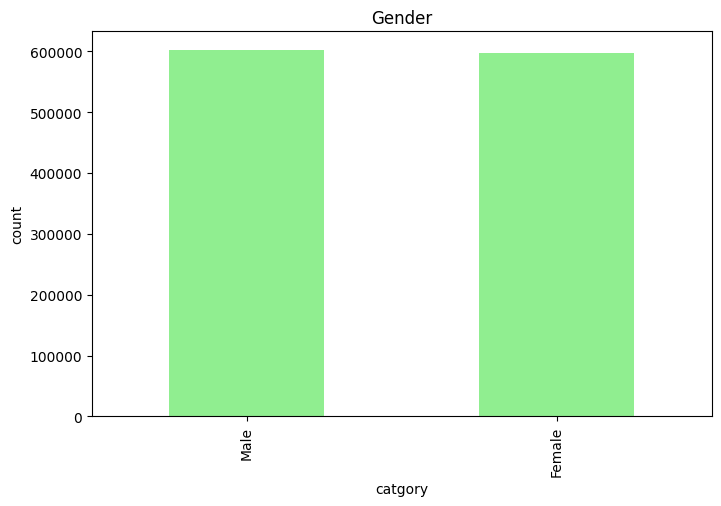

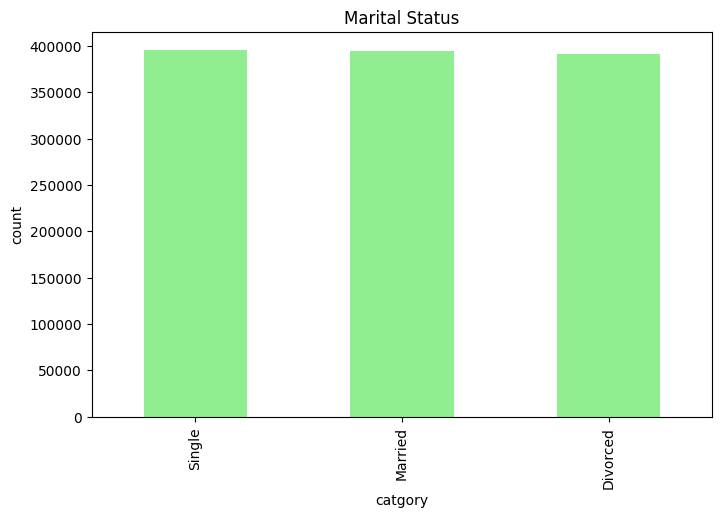

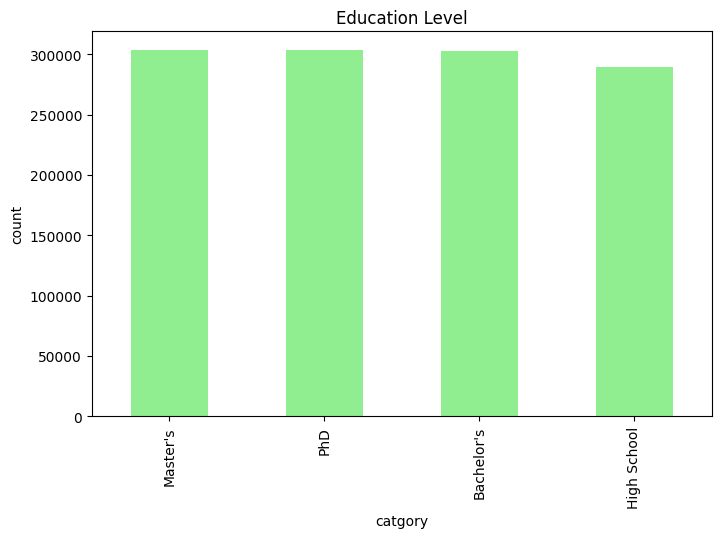

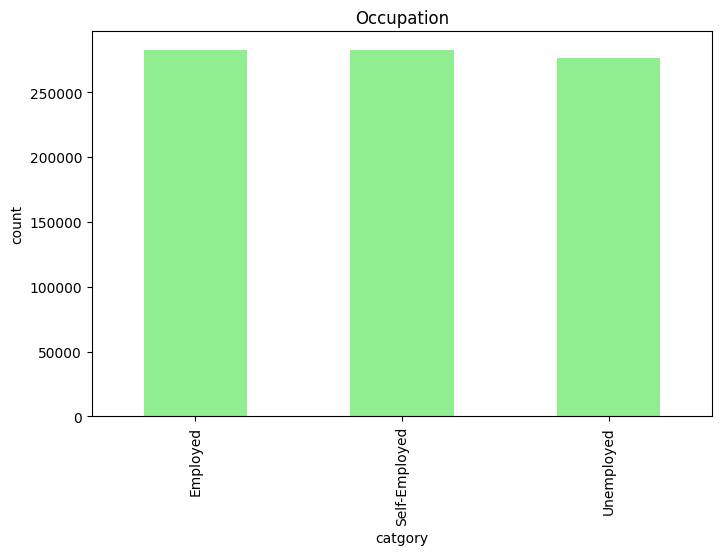

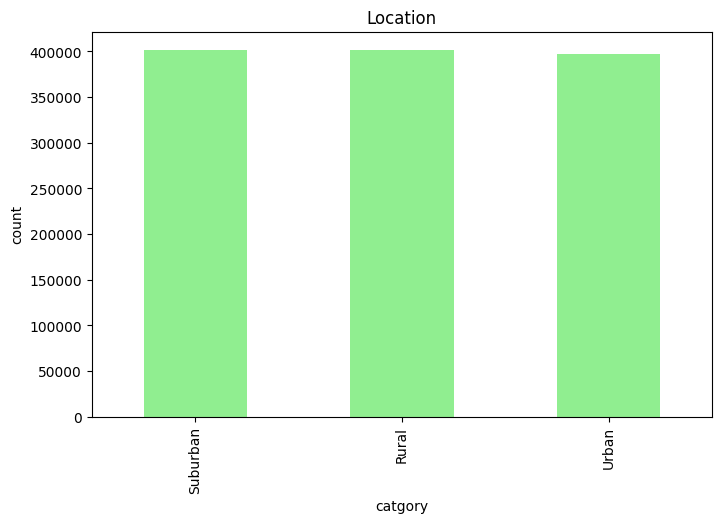

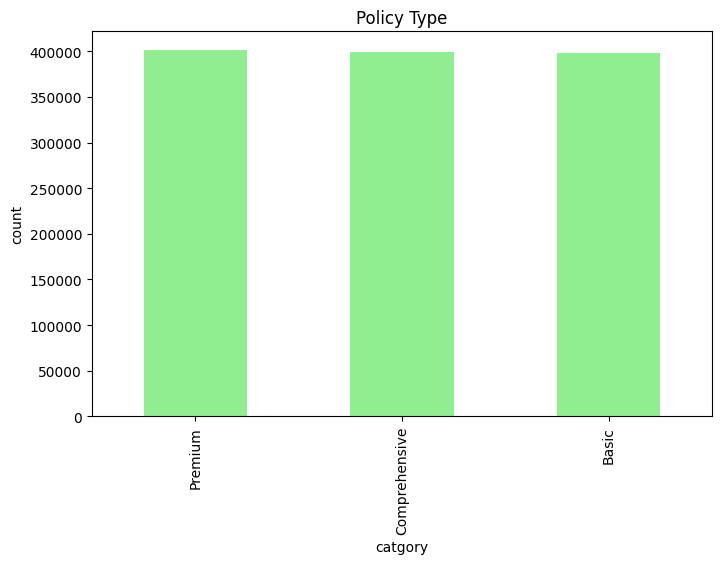

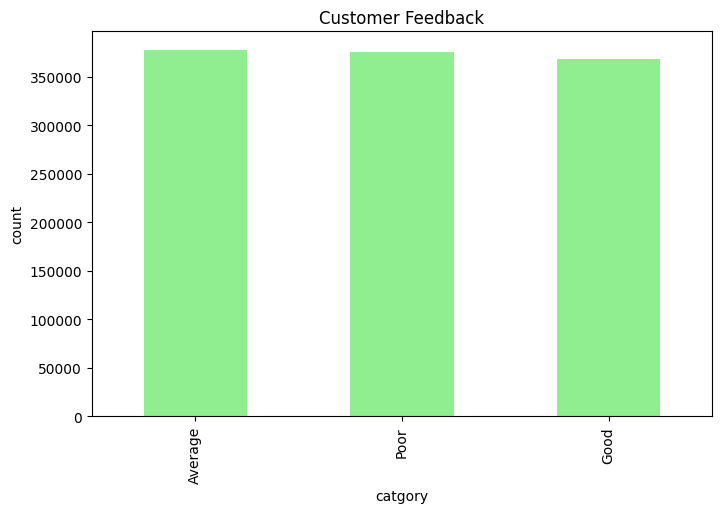

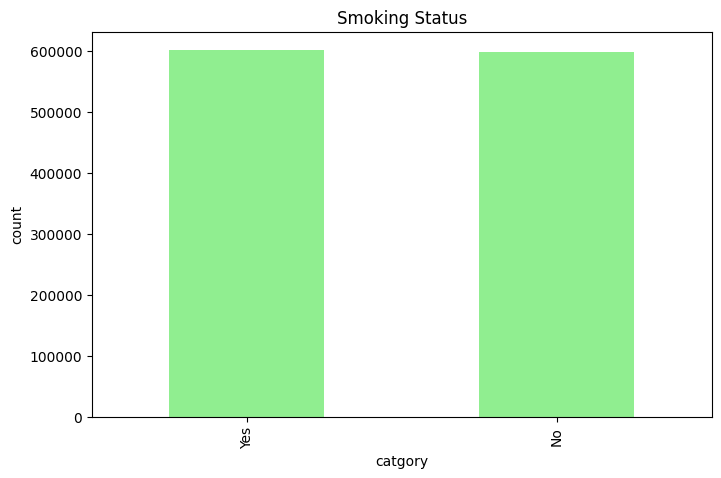

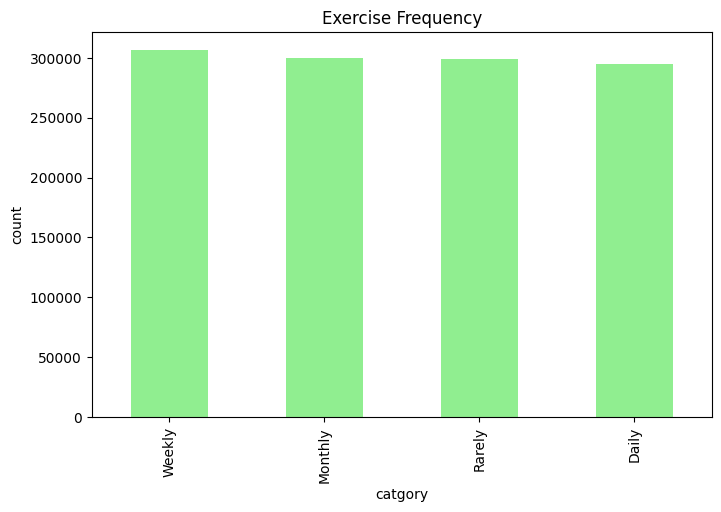

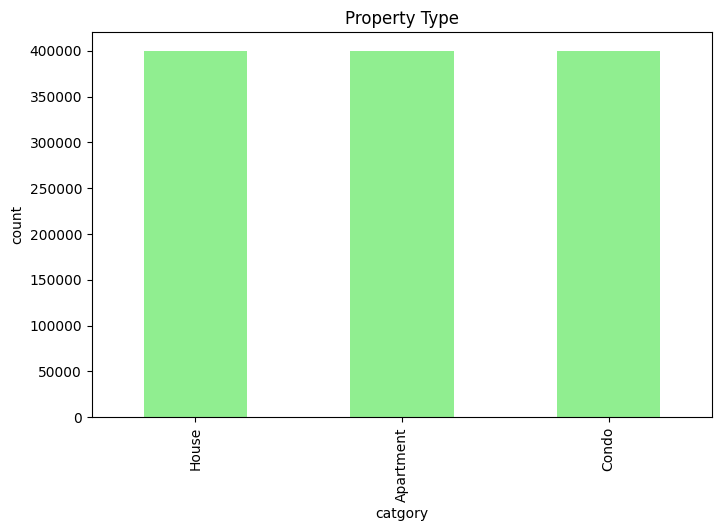

In [18]:
for i in cat:
    plt.figure(figsize=(8,5))
    df[i].value_counts().plot(kind='bar', color='lightgreen')
    plt.title(i)
    plt.xlabel('catgory')
    plt.ylabel('count')
    plt.show()

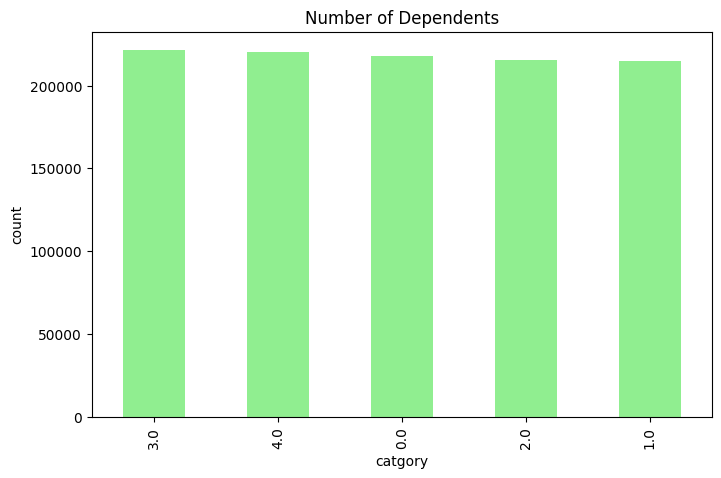

In [19]:
plt.figure(figsize=(8,5))
df['Number of Dependents'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Number of Dependents')
plt.xlabel('catgory')
plt.ylabel('count')
plt.show()


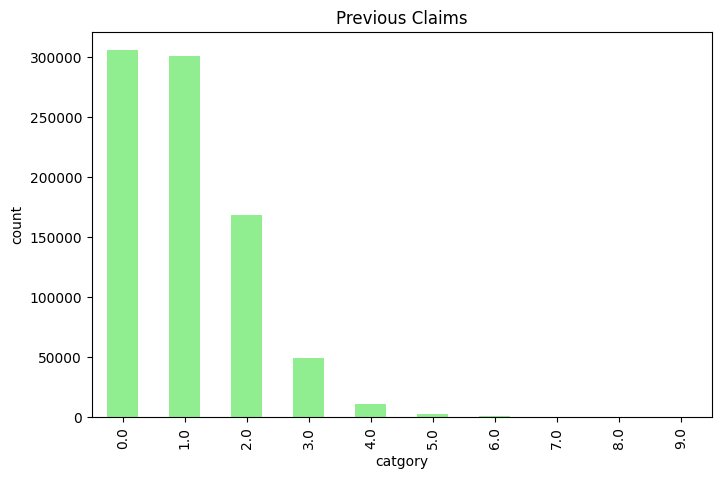

In [20]:
plt.figure(figsize=(8,5))
df['Previous Claims'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Previous Claims')
plt.xlabel('catgory')
plt.ylabel('count')
plt.show()


### >>show histgram for numarical columns befor handling missing values

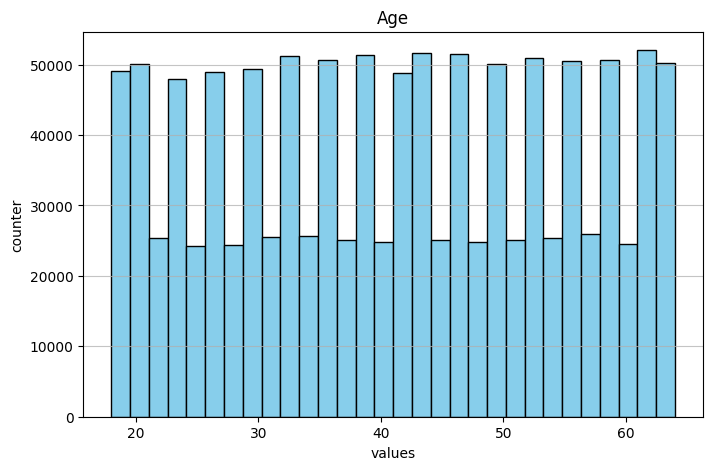

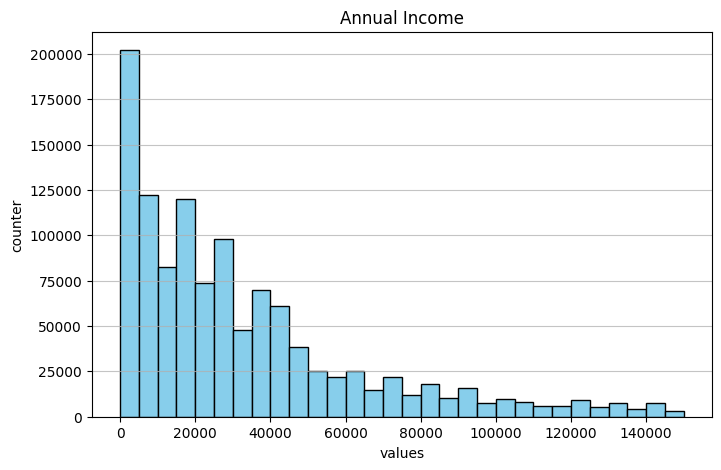

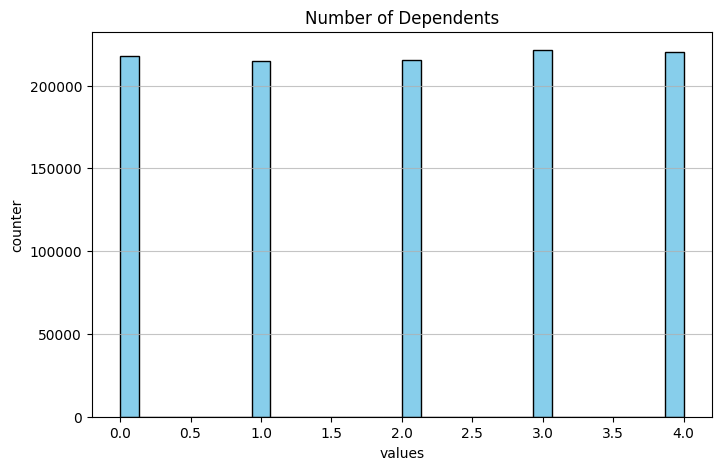

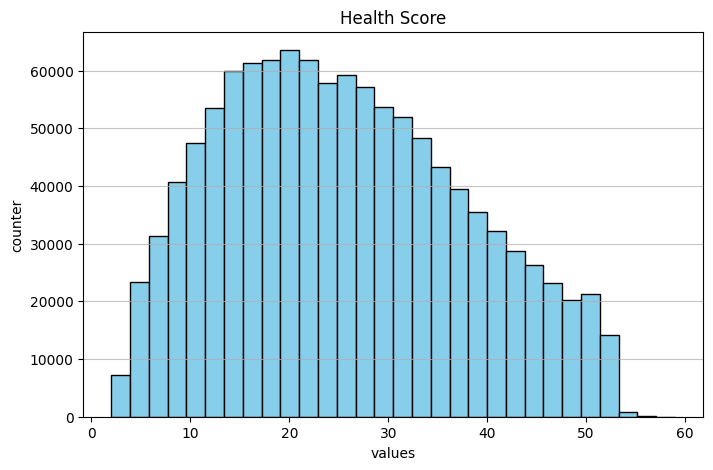

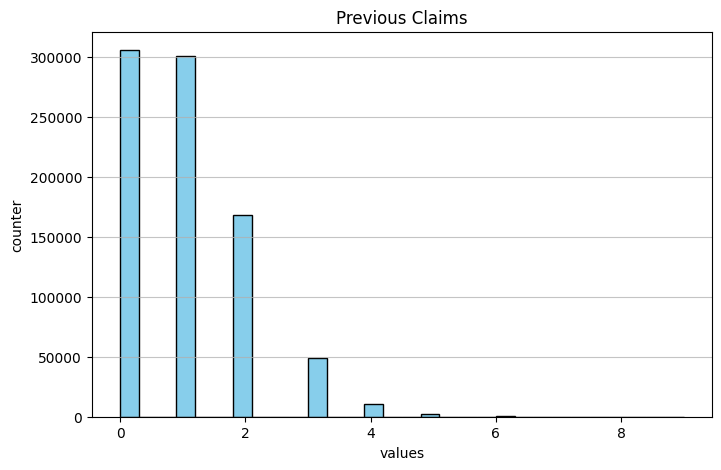

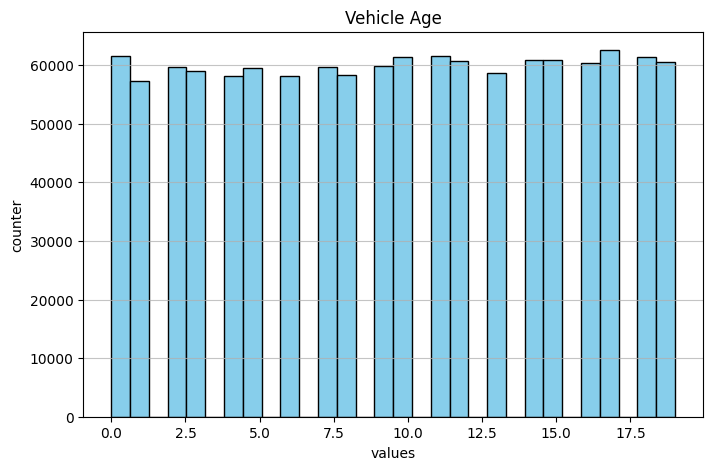

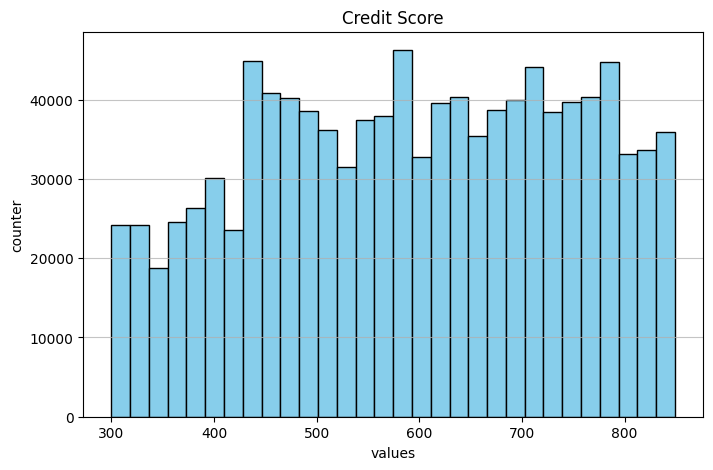

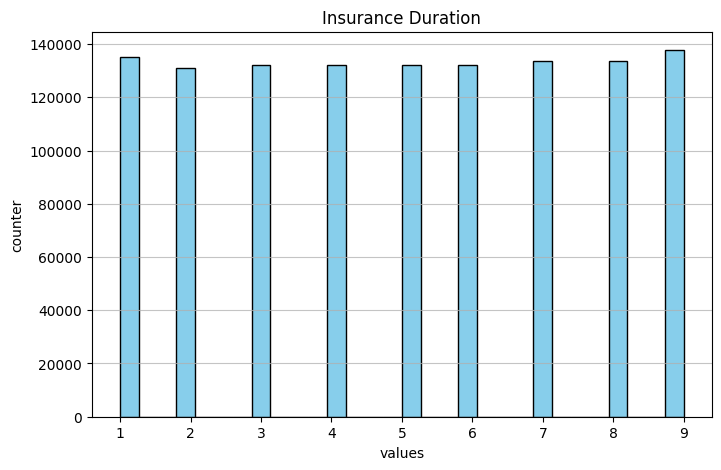

In [21]:
for i in num_missing:
    plt.figure(figsize=(8,5))             
    plt.hist(df[i], bins=30, color='skyblue', edgecolor='black') 
    plt.title(i)  
    plt.xlabel('values')                       
    plt.ylabel('counter')                       
    plt.grid(axis='y', alpha=0.75)            
    plt.show()

## Handling missing Values for catgorical columns

In [22]:

df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0]) # catgorical

In [23]:
# numerical
df['Number of Dependents'] = df['Number of Dependents'].fillna(-1.0) #fill missing values with -1.0

In [24]:
df['Number of Dependents'].value_counts()

Number of Dependents
 3.0    221475
 4.0    220340
 0.0    218124
 2.0    215313
 1.0    215076
-1.0    109672
Name: count, dtype: int64

In [25]:
# convert to categorical type
df['Number of Dependents'] = df['Number of Dependents'].astype('category') 
df['Number of Dependents'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1200000 entries, 0 to 1199999
Series name: Number of Dependents
Non-Null Count    Dtype   
--------------    -----   
1200000 non-null  category
dtypes: category(1)
memory usage: 1.1 MB


In [26]:
df['Occupation'] = df['Occupation'].cat.add_categories(["Unknown"]) # add new category

In [27]:
df['Occupation'] = df['Occupation'].fillna('Unknown')  # fill missing values with new category

In [28]:
df['Occupation'].isnull().sum()

0

In [29]:
print(Percen_DfNull('Customer Feedback'))

6.485333333333333


In [30]:
df['Customer Feedback'].value_counts()

Customer Feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64

In [31]:
# fill nan values py MODE 
df['Customer Feedback'] = df['Customer Feedback'].fillna(df['Customer Feedback'].mode()[0])


In [32]:
df['Customer Feedback'].isna().sum()

0

In [33]:
df['Customer Feedback'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1200000 entries, 0 to 1199999
Series name: Customer Feedback
Non-Null Count    Dtype   
--------------    -----   
1200000 non-null  category
dtypes: category(1)
memory usage: 1.1 MB


In [34]:
# remove Number of Dependents from numerical columns
num = num.drop(['Number of Dependents','Previous Claims'])
num

Index(['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score',
       'Insurance Duration', 'Premium Amount'],
      dtype='object')

In [35]:
# Previous Claims column is like catgorical column
# first convert to object colem
# than fill nan values 
# finaly convert to catgory and append in cat
df['Previous Claims'] = df['Previous Claims'].astype('object')
df['Previous Claims'] = df['Previous Claims'].fillna('Missing')
df['Previous Claims'] =df['Previous Claims'].astype('category')

In [36]:

df['Previous Claims'].isnull().sum()

0

In [37]:
# append 'Number of Dependents' and 'Previous Claims' to catgorical columns
cat=cat.append(pd.Index(['Number of Dependents','Previous Claims']))
cat

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type', 'Number of Dependents',
       'Previous Claims'],
      dtype='object')

## Handling missing Values for NUMERICAL columns

In [38]:
for i in num:
    if i in num_missing:
        print(f"{i} null percent =",Percen_DfNull(i))
    print(df[i].value_counts())
    print("***************************")

Age null percent = 1.55875
Age
53.0    26354
61.0    26218
39.0    26042
64.0    25990
57.0    25971
43.0    25966
62.0    25849
46.0    25756
33.0    25728
47.0    25709
44.0    25642
34.0    25615
58.0    25544
31.0    25500
56.0    25450
32.0    25435
54.0    25370
38.0    25346
36.0    25340
35.0    25323
22.0    25309
59.0    25173
37.0    25163
51.0    25162
55.0    25132
49.0    25107
45.0    25101
20.0    25055
21.0    24987
50.0    24943
40.0    24877
48.0    24834
26.0    24805
24.0    24690
30.0    24683
29.0    24673
19.0    24641
42.0    24626
60.0    24593
52.0    24592
18.0    24488
28.0    24455
63.0    24283
25.0    24221
27.0    24212
41.0    24117
23.0    23225
Name: count, dtype: int64
***************************
Annual Income null percent = 3.7457499999999997
Annual Income
7073.0      1039
16054.0     1019
14094.0      916
24897.0      914
15983.0      888
            ... 
121412.0       1
54758.0        1
83944.0        1
116936.0       1
40368.0        1
Name: co

In [39]:
#df['Age'] = df['Age'].fillna(df['Age'].mean())  # numerical
#df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].mean())  # numerical

In [40]:
col = df['Health Score']

In [41]:
m = round(col.mean(),2)
std = round(col.std(),2)
print(std,m)

12.2 25.61


In [42]:
# fill nan values py random values betwen m-std and m+std 
for i in num:
    if df[i].isnull().sum() > 0:
        m = df[i].mean()
        std = df[i].std()
        missing_idx = df[df[i].isna()].index
        rand_values = np.random.uniform(m - std, m + std, size=len(missing_idx))
        df.loc[missing_idx, i] = rand_values
        print(f"{i}: Filled {len(missing_idx)} missing values")
    else:
        print(f"{i}: No missing values")

Age: Filled 18705 missing values
Annual Income: Filled 44949 missing values
Health Score: Filled 74076 missing values
Vehicle Age: Filled 6 missing values
Credit Score: Filled 137882 missing values
Insurance Duration: Filled 1 missing values
Premium Amount: No missing values


# **Step3 Visulization - Exploratory Data Analysis EDA¶**


## show histgram for numarical columns **after** handling missing values

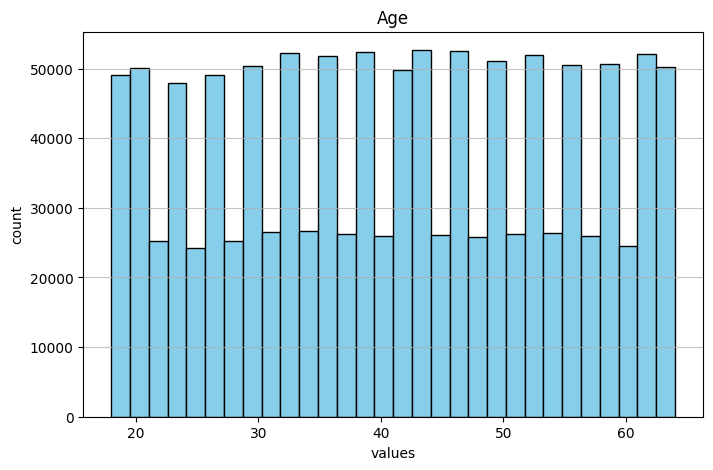

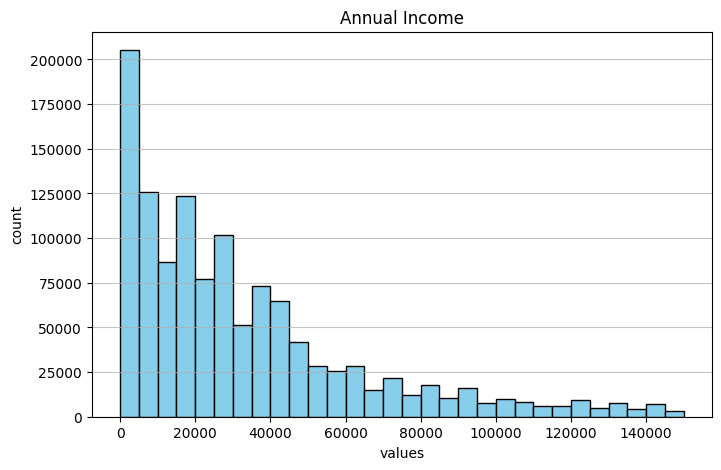

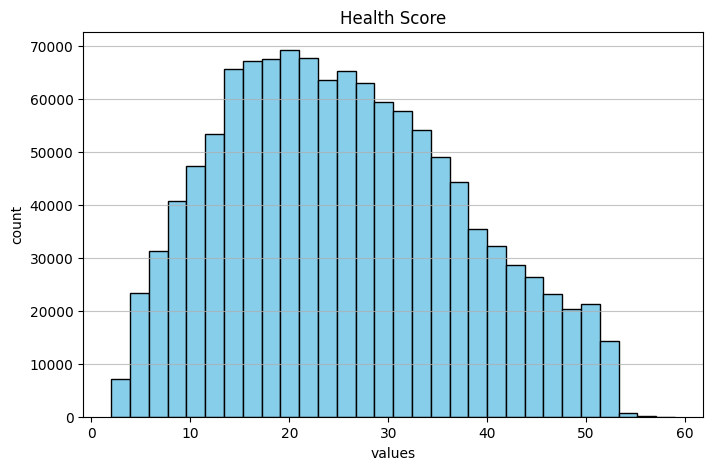

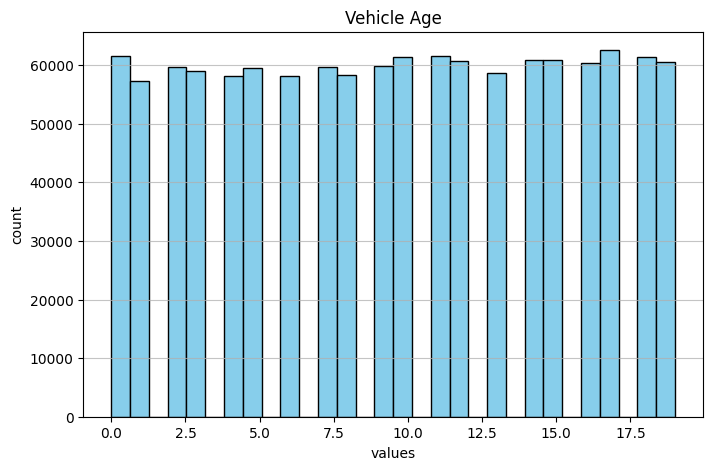

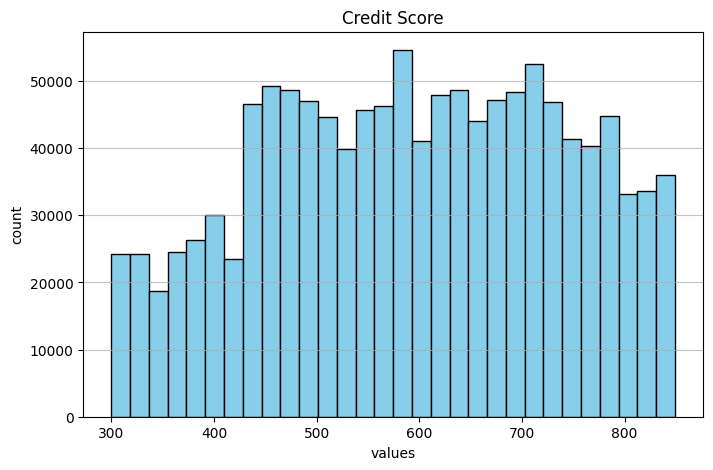

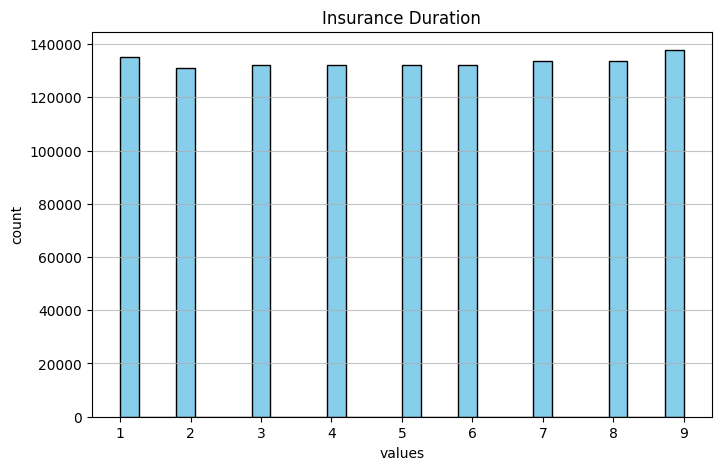

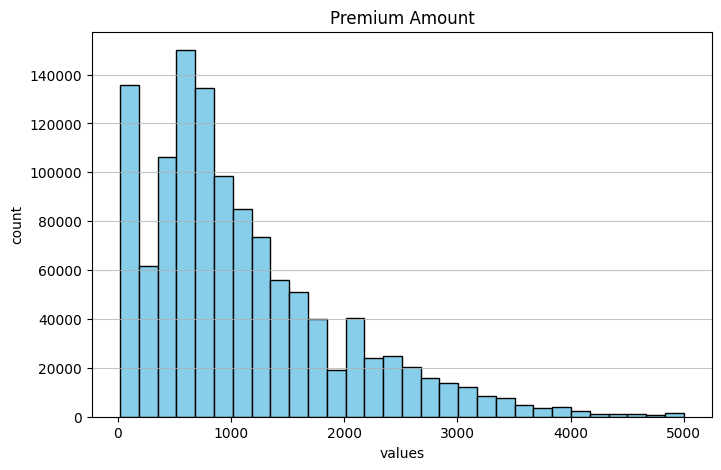

In [43]:
for i in num:
    plt.figure(figsize=(8,5))             
    plt.hist(df[i], bins=30, color='skyblue', edgecolor='black') 
    plt.title(i)  
    plt.xlabel('values')                       
    plt.ylabel('count')                       
    plt.grid(axis='y', alpha=0.75)            
    plt.show()


## show Par plot for catgorical columns  **after** handling missing values add Code

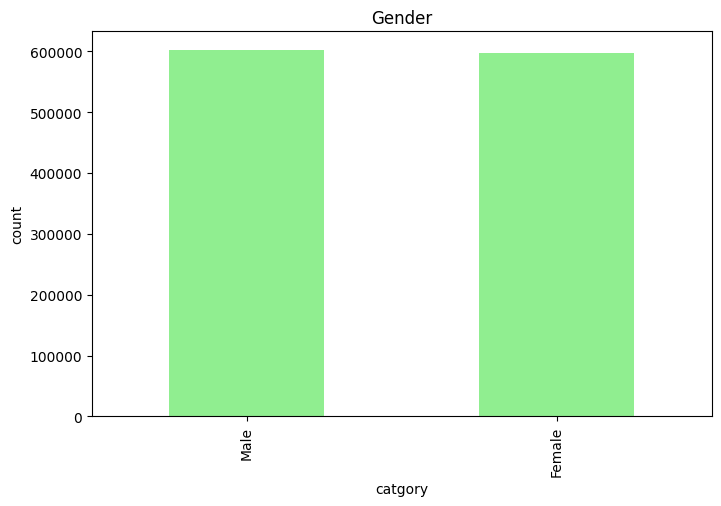

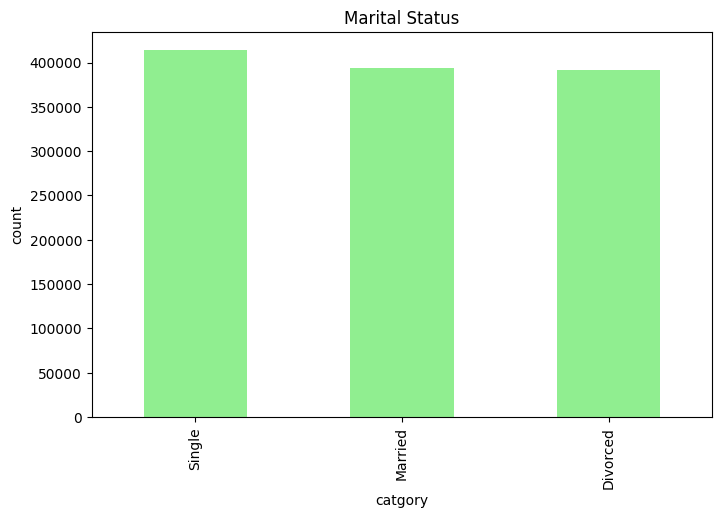

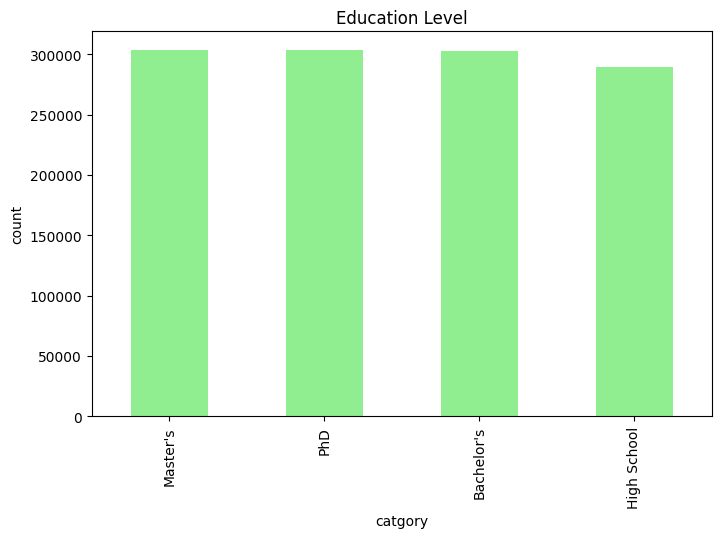

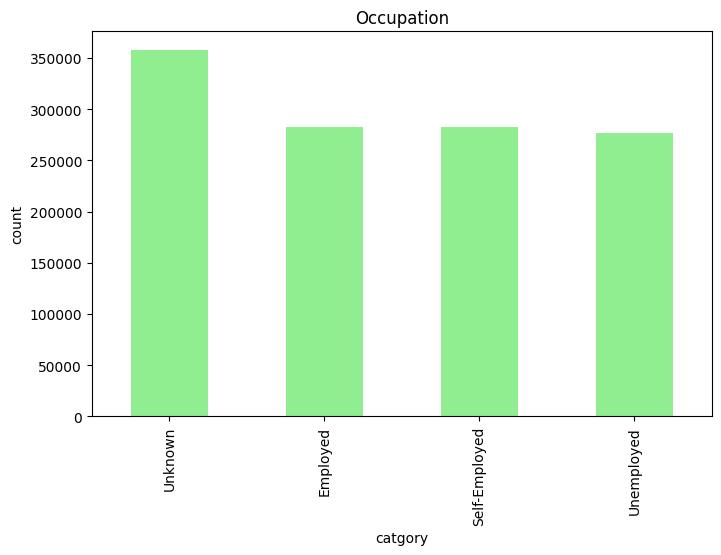

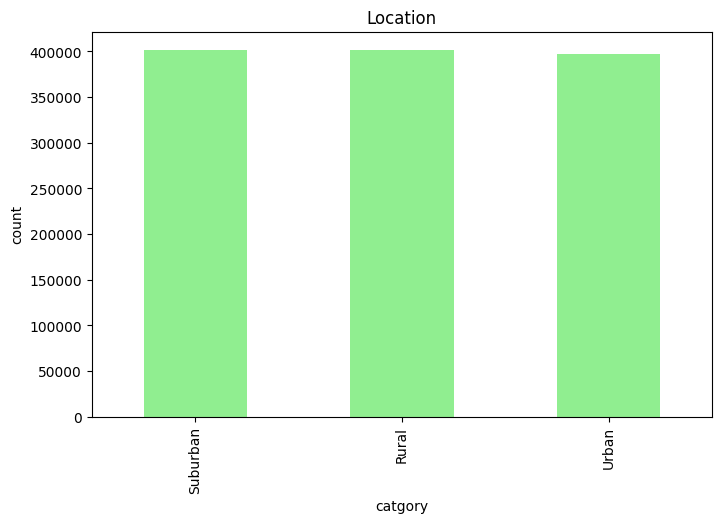

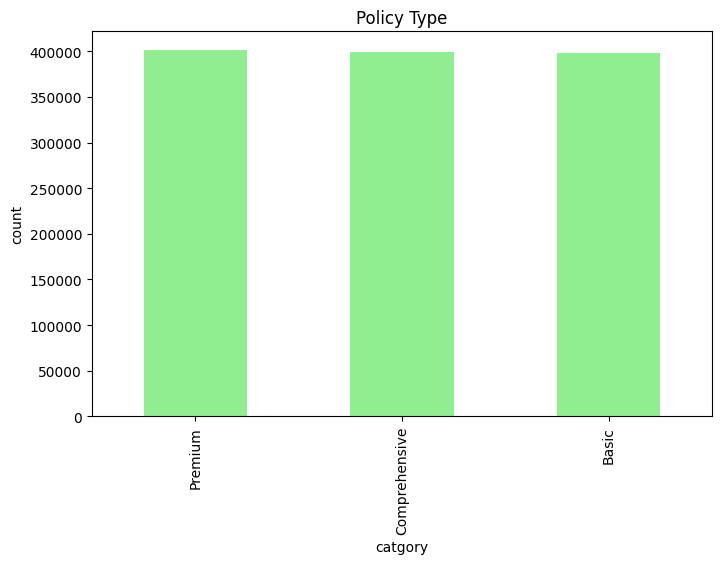

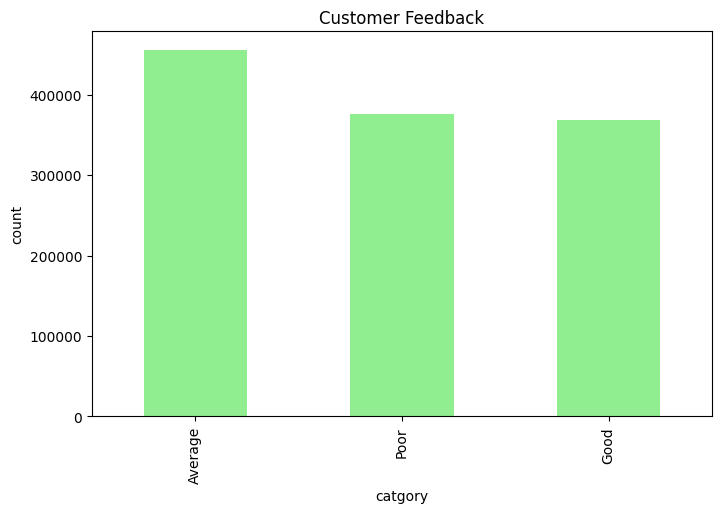

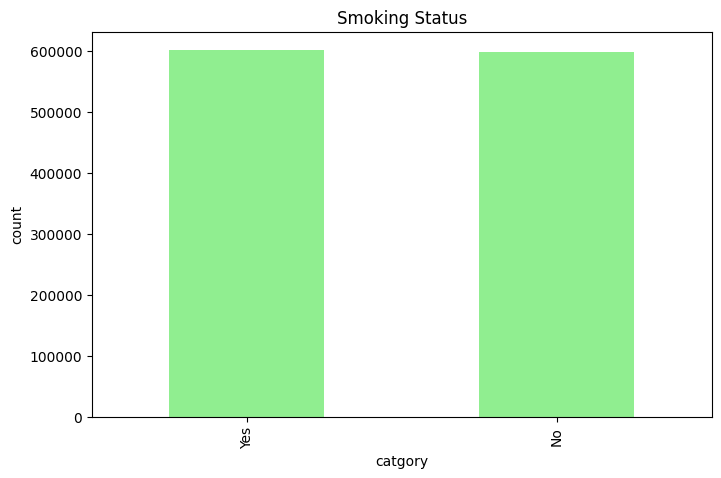

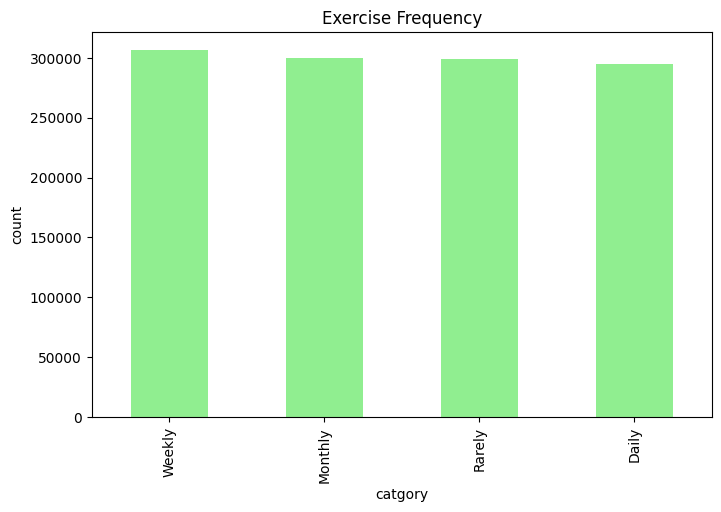

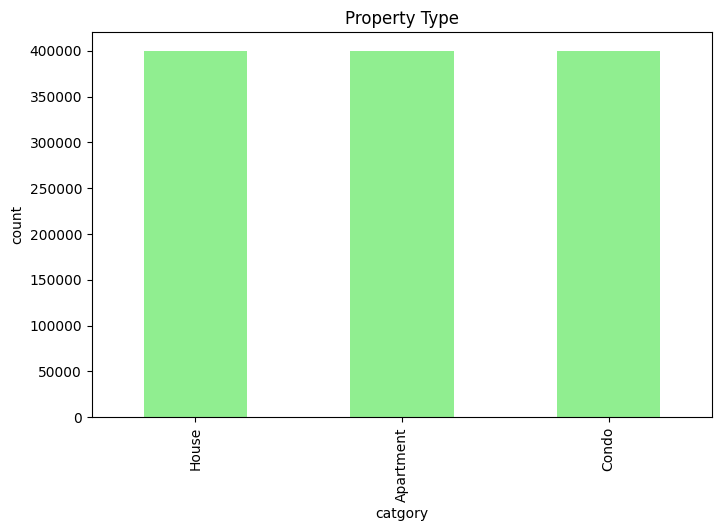

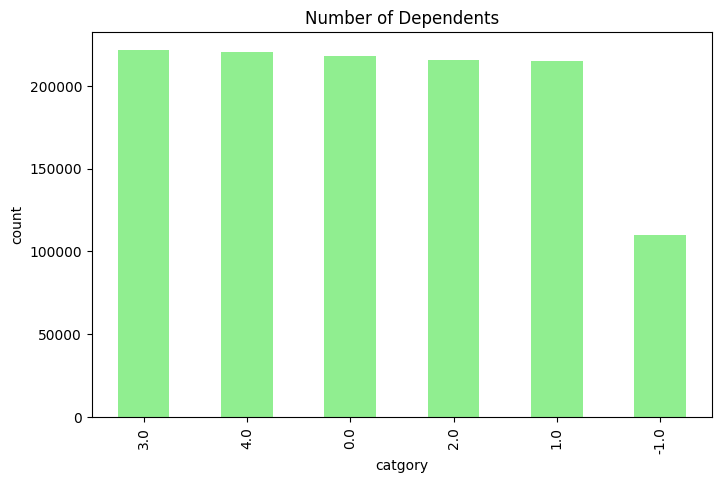

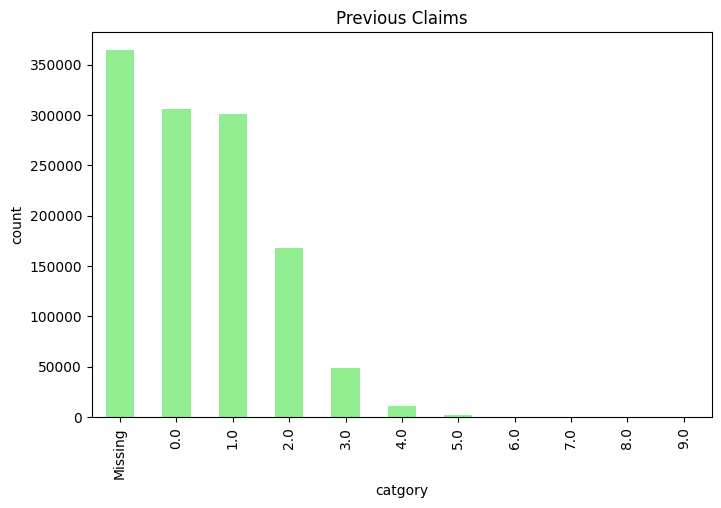

In [44]:
for i in cat:
    plt.figure(figsize=(8,5))
    df[i].value_counts().plot(kind='bar', color='lightgreen')
    plt.title(i)
    plt.xlabel('catgory')
    plt.ylabel('count')
    plt.show()
